In [55]:
"""
- 원래는 matplotlib의 animation을 이용해서 비디오를 만들고 그려보려고 했으나, 몇가지이유로 매우 어려워짐
    - 우선, matplotlib의 animation이 jupyter notebook과 매우 안 붙음. 쥬피터에서 animation이 매우 안 굴러감
    - 몇몇 코드의 경우, 굴러가게 만들었는데, 그 다음에도 비디오 파일, gif로 저장하는 것이 매우 어려움. 
        - writer를 설치해야 하는데, ffmpeg를 설치했는데도 설치안되었다고 한다거나.
        - imagenick인가 설치하라는데, 그것도 설치가 pip, brew 등으로 되지 않음.
- 다른 길이 있나 싶어서, 찾아보다가. 이미지를 numpy.array로 가지고 있다면 이걸 사용해서 비디오로 만들어주는 케이스를 발견함
    - matplotlib의 figure를 np.array로 변환하는 것은 크게 어렵지 않을 것 같고
    - 이미지를 비디오로 만든다면, 이 경우가 마크다운, 쥬피터 노트북 등에서 확인하는 것이 더 쉬울 것처럼 보임. 

"""

'\n- 원래는 matplotlib의 animation을 이용해서 비디오를 만들고 그려보려고 했으나, 몇가지이유로 매우 어려워짐\n    - 우선, matplotlib의 animation이 jupyter notebook과 매우 안 붙음. 쥬피터에서 animation이 매우 안 굴러감\n    - 몇몇 코드의 경우, 굴러가게 만들었는데, 그 다음에도 비디오 파일, gif로 저장하는 것이 매우 어려움. \n        - writer를 설치해야 하는데, ffmpeg를 설치했는데도 설치안되었다고 한다거나.\n        - imagenick인가 설치하라는데, 그것도 설치가 pip, brew 등으로 되지 않음.\n- 다른 길이 있나 싶어서, 찾아보다가. 이미지를 numpy.array로 가지고 있다면 이걸 사용해서 비디오로 만들어주는 케이스를 발견함\n    - matplotlib의 figure를 np.array로 변환하는 것은 크게 어렵지 않을 것 같고\n    - 이미지를 비디오로 만든다면, 이 경우가 마크다운, 쥬피터 노트북 등에서 확인하는 것이 더 쉬울 것처럼 보임. \n\n'

In [4]:
# figure to np.array
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

plt.style.use('dark_background')

for i in range(0, 5):
    x = np.random.normal(0, 1, ((i+1)*30))
    y = np.random.normal(0, 1, ((i+1)*30))
    f = plt.figure(figsize=(5, 5))
    plt.scatter(x, y, alpha=0.3)
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    #plt.axis('off')
    file_name = '../../assets/images/markdown_img/180628_1422_test_img_{}.jpg'.format(i)
    plt.savefig(file_name)
    
#images1And2 = Image.blend(image1, image2, 0.5)

In [64]:
def imgs_to_video(imgs, video_file_path):
    pass
    
img1 = Image.open("/Users/frhyme/Downloads/IMG_9715.JPG".format(1))
img2 = Image.open("/Users/frhyme/Downloads/IMG_9715.JPG".format(1))

height, width, layers =  np.array(img1).shape
print(np.array(img1).shape)

video = cv2.VideoWriter("../../assets/images/markdown_img/180628_test_video.mp4", # Filename
                        cv2.VideoWriter_fourcc(*"XVID"), # codec selection 
                        10, # frames per second 
                        (width,height) # The width and height come from the stats of image1
                        )

for i in range(0,30):
    images1And2 = Image.blend(img1, img2, i/30.0)
    # Conversion from PIL to OpenCV from: http://blog.extramaster.net/2015/07/python-converting-from-pil-to-opencv-2.html
    video.write(cv2.cvtColor(np.array(images1And2), cv2.COLOR_RGB2BGR))
    #video.write(np.array(images1And2))

# And back from image2 to image1...
for i in range(0,30):
    images2and1 = Image.blend(img2, img1, i/30.0)
    video.write(cv2.cvtColor(np.array(images2and1), cv2.COLOR_RGB2BGR))
    #video.write(np.array(images2and1))
video.release()
print('complete')
show_video_in_jupyter_nb("../../assets/images/markdown_img/180628_test_video.mp4")

(1440, 1080, 3)
complete


In [62]:
def imgs_to_video(imgs, video_file_path):
    """
    imgs는 np.array로 구성된 list
    "../../assets/images/markdown_img/180628_test_video.mp4"
    """
    height, width, layers = imgs[0].shape
    print(height, width, layers)
    video = cv2.VideoWriter(video_file_path, # Filename
                            cv2.VideoWriter_fourcc(*"XVID"), # codec selection 
                            10, # frames per second 
                            (width,height) # The width and height come from the stats of image1
                           )
    for img in imgs:
        video.write(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
        #video.write(img)
    video.release()
    print("video encoding complete")

img = Image.open('/Users/frhyme/Downloads/IMG_9715.JPG')
img_a, img_b = np.array(img), np.array(img)*20

imgs = []
for r in np.linspace(0, 1, 10):
    blended_img = (img_a*r + img_b*(1-r))/256
    imgs.append(blended_img)
    
imgs_to_video(imgs, "../../assets/images/markdown_img/180702_cat_blending.mp4")

1440 1080 3


error: OpenCV(3.4.1) /opt/conda/conda-bld/opencv-suite_1527005509093/work/modules/imgproc/src/color.cpp:11109: error: (-215) depth == 0 || depth == 2 || depth == 5 in function cvtColor


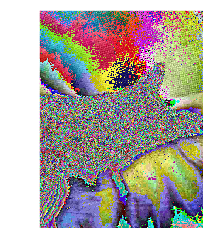

In [179]:
def show_video_in_jupyter_nb(width, height, video_url):
    from IPython.display import HTML
    return HTML("""<video width="{}" height="{}" controls>
    <source src={} type="video/mp4">
    </video>""".format(width, height, video_url))
video_url = '../../assets/images/markdown_img/180628_test_video.mp4'
show_video_in_jupyter_nb(200, 300,video_url)

In [70]:
import io
import base64
from IPython.display import HTML
video = io.open('../../assets/images/markdown_img/180628_test_video.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))
""""""

''

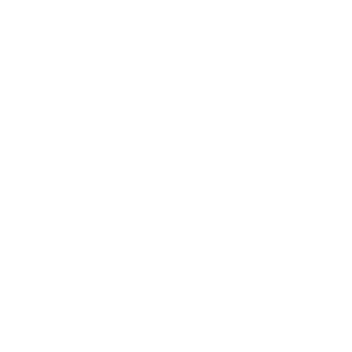

In [123]:
"""
https://stackoverflow.com/questions/4092927/generating-movie-from-python-without-saving-individual-frames-to-files
"""
import matplotlib.animation as animation
import numpy as np
from pylab import *

dpi = 100

def ani_frame():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    im = ax.imshow(rand(300,300),cmap='gray',interpolation='nearest')
    im.set_clim([0,1])
    fig.set_size_inches([5,5])

    tight_layout()

    def update_img(n):
        tmp = np.random.normal(n, 1, (300, 300))
        im.set_data(tmp)
        return im

    #legend(loc=0)
    """
    frames: If an integer, then equivalent to passing range(frames)
    interval: Delay between frames in milliseconds. Defaults to 200.
    """
    ani = animation.FuncAnimation(fig, func=update_img,
                                  frames=30,
                                  interval=300)
    writer = animation.writers['ffmpeg'](fps=30)

    ani.save('demo.mp4',writer=writer,dpi=dpi)
    return ani
ani_frame()
show_video_in_jupyter_nb('demo.mp4')

0.0
0.0
0.111111111111


ValueError: Invalid file object: <_io.BufferedReader name=75>

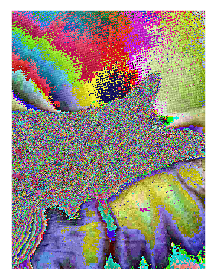

In [94]:
"""
https://stackoverflow.com/questions/4092927/generating-movie-from-python-without-saving-individual-frames-to-files
"""
import matplotlib.animation as animation
import numpy as np
import matplotlib.image as mpimg

dpi = 100

def ani_frame():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    img1 = mpimg.imread("/Users/frhyme/Downloads/IMG_9715.JPG")
    img2 = img1*20
    
    im = ax.imshow(img1)

    #im.set_clim([0,1])
    #fig.set_size_inches([5,5])

    plt.tight_layout()

    def update_img(n):
        print(n)
        blended = (img1*n/256 + img2*(1-n/256))/256
        im.set_data(blended)
        return im

    #legend(loc=0)
    """
    frames: If an integer, then equivalent to passing range(frames)
    interval: Delay between frames in milliseconds. Defaults to 200.
    """
    ani = animation.FuncAnimation(fig, func=update_img,
                                  frames=np.linspace(0, 1, 10),
                                  interval=300)
    writer = animation.writers['ffmpeg'](fps=30)

    ani.save('demo.mp4',writer=writer,dpi=dpi)
    return ani
ani_frame()
show_video_in_jupyter_nb('demo.mp4')

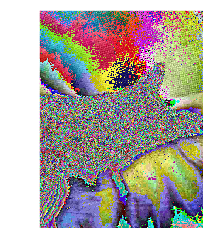

In [78]:
img1 = Image.open("/Users/frhyme/Downloads/IMG_9715.JPG".format(1))
img2 = Image.open("/Users/frhyme/Downloads/IMG_9715.JPG".format(1))
img1, img2 = np.array(img1), np.array(img2)

plt.imshow(img1*20)

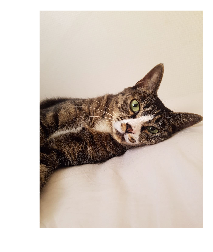

In [89]:
a = mpimg.imread("/Users/frhyme/Downloads/IMG_9715.JPG")
plt.imshow(a)


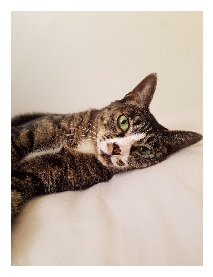

In [174]:
"""
https://stackoverflow.com/questions/4092927/generating-movie-from-python-without-saving-individual-frames-to-files
"""
import matplotlib.animation as animation
import numpy as np
from pylab import *



def ani_frame(output_file_path):
    """
    - np.array로 넘기는 것은 문제가 없는데, 0과 1사이의 float으로 변형해서 넘길 것 
    """
    ### read data 
    img1 = mpimg.imread("/Users/frhyme/Downloads/IMG_9715.JPG")
    img2 = img1*20
    img1, img2 = img1/256, img2/256
    height, width, layers = img1.shape
    
    ### make figure 
    fig, ax = plt.subplots(1, 1, figsize=(3, 4))
    ax.get_xaxis().set_visible(False), ax.get_yaxis().set_visible(False)
    plt.axis('off')
    im = ax.imshow(img1,interpolation='nearest')
    #plt.close()# 이미지 한장 뜨는걸 방지함. 
    def update_img(f):#frame가 넘어옴
        tmp = img1 * f + img2* (1-f)
        im.set_data(tmp)
        return im
    """
    frames: If an integer, then equivalent to passing range(frames)
    interval: Delay between frames in milliseconds. Defaults to 200.
    """
    tight_layout()
    ani = animation.FuncAnimation(fig, func=update_img,
                                  frames=np.linspace(0, 1, 150),
                                  interval=500)
    ## ffmpeg가 깔려 있어야 할 수 있는데 brew install ffmpeg 를 사용하는 것이 좋음. 
    writer = animation.writers['ffmpeg'](fps=25)
    dpi = 256
    ani.save(output_file_path,writer=writer,dpi=dpi)
    return ani

video_url = '../../assets/images/markdown_img/180702_cat_blending.mp4'
ani_frame(video_url)
show_video_in_jupyter_nb(video_url)